In [1]:
import mlflow
from mlflow.tracking import MlflowClient
import dagshub
from datetime import datetime
import pandas as pd

In [3]:
REPO_OWNER = "hamzaboughanim06"
REPO_NAME = "DL-kidney-disease-classification"
MLFLOW_URI = f"https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow"

dagshub.init(
    repo_owner=REPO_OWNER,
    repo_name=REPO_NAME,
    mlflow=True
)

mlflow.set_tracking_uri(MLFLOW_URI)
mlflow.set_registry_uri(MLFLOW_URI)

client = MlflowClient()

print(f"Connected to: {MLFLOW_URI}")

Initialized MLflow to track repo "hamzaboughanim06/DL-kidney-disease-classification"

Repository hamzaboughanim06/DL-kidney-disease-classification initialized!

Connected to: https://dagshub.com/hamzaboughanim06/DL-kidney-disease-classification.mlflow


In [4]:
registered_models = client.search_registered_models()

print(f"📦 Total Registered Models: {len(registered_models)}")
print("\nModels:")
for model in registered_models:
    print(f"  - {model.name}")

📦 Total Registered Models: 1

Models:
  - VGG16Model


In [5]:
def display_all_models_detailed():
    """Display all models with detailed version information"""
    
    for model in registered_models:
        print("=" * 100)
        print(f"🔹 MODEL: {model.name}")
        print("=" * 100)
        print(f"Description: {model.description or 'N/A'}")
        print(f"Created: {datetime.fromtimestamp(model.creation_timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Last Updated: {datetime.fromtimestamp(model.last_updated_timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')}")
        print()
        
        # Get all versions
        versions = client.search_model_versions(f"name='{model.name}'")
        versions = sorted(versions, key=lambda x: int(x.version), reverse=True)
        
        print(f"📊 VERSIONS ({len(versions)} total):")
        print("-" * 100)
        
        for v in versions:
            stage_emoji = {
                "None": "⚪",
                "Staging": "🟡",
                "Production": "🟢",
                "Archived": "⚫"
            }
            emoji = stage_emoji.get(v.current_stage, "⚪")
            
            print(f"{emoji} Version {v.version}")
            print(f"   Stage: {v.current_stage}")
            print(f"   Status: {v.status}")
            print(f"   Run ID: {v.run_id}")
            print(f"   Created: {datetime.fromtimestamp(v.creation_timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')}")
            print()
        
        print()

display_all_models_detailed()

🔹 MODEL: VGG16Model
Description: N/A
Created: 2025-11-14 22:58:10
Last Updated: 2025-11-16 14:52:00

📊 VERSIONS (7 total):
----------------------------------------------------------------------------------------------------
⚪ Version 8
   Stage: None
   Status: READY
   Run ID: 94ff925ac29746aaa1b49996d1cdc2c9
   Created: 2025-11-16 14:52:00

⚪ Version 7
   Stage: None
   Status: READY
   Run ID: fcc7c65d68cf4c5486f9e1f0ddcda15e
   Created: 2025-11-16 14:22:59

⚪ Version 6
   Stage: None
   Status: READY
   Run ID: 2f078dde72b8472685e6ff7c60978aba
   Created: 2025-11-16 13:53:31

⚪ Version 4
   Stage: None
   Status: READY
   Run ID: e85502e9b07c4c19be9e86b68593ae05
   Created: 2025-11-16 00:42:22

⚪ Version 3
   Stage: None
   Status: READY
   Run ID: e47fd315fb1344f1b658e495d9d95065
   Created: 2025-11-15 23:31:13

⚪ Version 2
   Stage: None
   Status: READY
   Run ID: 13ac606bfd4248cb87596d82ebbf64e2
   Created: 2025-11-15 23:10:25

⚪ Version 1
   Stage: None
   Status: READY
   Run

In [6]:
def get_models_dataframe():
    """Create a pandas DataFrame with all models and versions"""
    
    data = []
    
    for model in registered_models:
        versions = client.search_model_versions(f"name='{model.name}'")
        
        for v in versions:
            data.append({
                'Model Name': model.name,
                'Version': v.version,
                'Stage': v.current_stage,
                'Status': v.status,
                'Run ID': v.run_id[:8] + "...",  # Shortened for display
                'Created': datetime.fromtimestamp(v.creation_timestamp/1000).strftime('%Y-%m-%d %H:%M')
            })
    
    df = pd.DataFrame(data)
    
    # Sort by model name and version (descending)
    df = df.sort_values(['Model Name', 'Version'], ascending=[True, False])
    
    return df

# Display DataFrame
df_models = get_models_dataframe()
print("📊 ALL MODELS AND VERSIONS:")
print()
display(df_models)

📊 ALL MODELS AND VERSIONS:



,Model Name,Version,Stage,Status,Run ID,Created
0,VGG16Model,8,None,READY,94ff925a...,2025-11-16 14:52
1,VGG16Model,7,None,READY,fcc7c65d...,2025-11-16 14:22
2,VGG16Model,6,None,READY,2f078dde...,2025-11-16 13:53
3,VGG16Model,4,None,READY,e85502e9...,2025-11-16 00:42
4,VGG16Model,3,None,READY,e47fd315...,2025-11-15 23:31
5,VGG16Model,2,None,READY,13ac606b...,2025-11-15 23:10
6,VGG16Model,1,None,READY,fbf72ded...,2025-11-14 22:58


In [7]:
def display_summary():
    """Display summary statistics"""
    
    print("=" * 80)
    print("📈 SUMMARY STATISTICS")
    print("=" * 80)
    
    for model in registered_models:
        versions = client.search_model_versions(f"name='{model.name}'")
        
        prod_count = sum(1 for v in versions if v.current_stage == "Production")
        staging_count = sum(1 for v in versions if v.current_stage == "Staging")
        none_count = sum(1 for v in versions if v.current_stage == "None")
        archived_count = sum(1 for v in versions if v.current_stage == "Archived")
        
        print(f"\n{model.name}:")
        print(f"  🟢 Production: {prod_count}")
        print(f"  🟡 Staging: {staging_count}")
        print(f"  ⚪ None: {none_count}")
        print(f"  ⚫ Archived: {archived_count}")
        print(f"  📦 Total Versions: {len(versions)}")
    
    print("\n" + "=" * 80)

display_summary()

📈 SUMMARY STATISTICS

VGG16Model:
  🟢 Production: 0
  🟡 Staging: 0
  ⚪ None: 7
  ⚫ Archived: 0
  📦 Total Versions: 7



In [13]:
def filter_by_stage(stage):
    """Filter models by specific stage"""
    
    print(f"\n🔍 Models in '{stage}' stage:")
    print("-" * 60)
    
    found = False
    for model in registered_models:
        versions = client.get_latest_versions(model.name, stages=[stage])
        
        if versions:
            found = True
            for v in versions:
                print(f"  {model.name} - Version {v.version}")
    
    if not found:
        print(f"  ⚠ No models found in '{stage}' stage")

# Filter by Production
filter_by_stage("Production")

# Filter by other stages
# filter_by_stage("Staging")
# filter_by_stage("None")
# filter_by_stage("Archived")


🔍 Models in 'Production' stage:
------------------------------------------------------------
  VGG16Model - Version 8


In [14]:
def get_production_model(model_name):
    """Get the current Production version of a specific model"""
    
    prod_versions = client.get_latest_versions(model_name, stages=["Production"])
    
    if prod_versions:
        v = prod_versions[0]
        print(f"\n🟢 PRODUCTION MODEL: {model_name}")
        print("-" * 60)
        print(f"Version: {v.version}")
        print(f"Run ID: {v.run_id}")
        print(f"Status: {v.status}")
        print(f"Created: {datetime.fromtimestamp(v.creation_timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Source: {v.source}")
        return v
    else:
        print(f"⚠ No Production version found for '{model_name}'")
        return None

# Get Production model for VGG16Model
prod_model = get_production_model("VGG16Model")


🟢 PRODUCTION MODEL: VGG16Model
------------------------------------------------------------
Version: 8
Run ID: 94ff925ac29746aaa1b49996d1cdc2c9
Status: READY
Created: 2025-11-16 14:52:00
Source: mlflow-artifacts:/73acc4c57a6a4229b4de19dc204ae180/94ff925ac29746aaa1b49996d1cdc2c9/artifacts/model


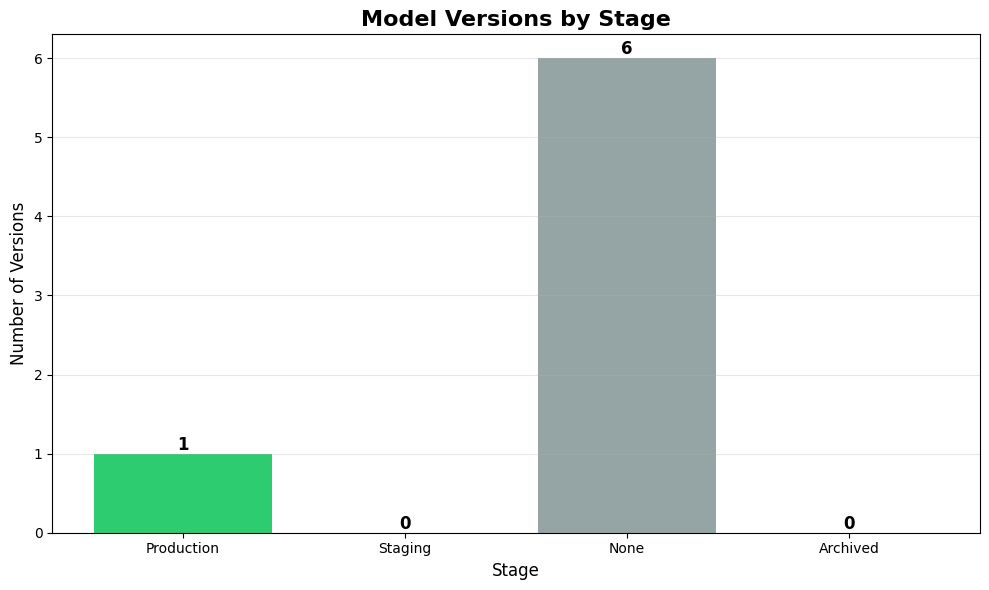

In [15]:
import matplotlib.pyplot as plt

def visualize_model_stages():
    """Create a bar chart showing model versions by stage"""
    
    stage_counts = {
        'Production': 0,
        'Staging': 0,
        'None': 0,
        'Archived': 0
    }
    
    for model in registered_models:
        versions = client.search_model_versions(f"name='{model.name}'")
        for v in versions:
            stage_counts[v.current_stage] += 1
    
    # Create bar chart
    plt.figure(figsize=(10, 6))
    colors = ['#2ecc71', '#f39c12', '#95a5a6', '#34495e']
    bars = plt.bar(stage_counts.keys(), stage_counts.values(), color=colors)
    
    plt.title('Model Versions by Stage', fontsize=16, fontweight='bold')
    plt.xlabel('Stage', fontsize=12)
    plt.ylabel('Number of Versions', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

visualize_model_stages()

In [16]:
def compare_model_versions(model_name):
    """Compare metrics across different versions"""
    
    versions = client.search_model_versions(f"name='{model_name}'")
    
    data = []
    for v in versions:
        
        run = client.get_run(v.run_id)
        metrics = run.data.metrics
        
        data.append({
            'Version': v.version,
            'Stage': v.current_stage,
            'Loss': metrics.get('loss', 'N/A'),
            'Accuracy': metrics.get('accuracy', 'N/A'),
            'Created': datetime.fromtimestamp(v.creation_timestamp/1000).strftime('%Y-%m-%d %H:%M')
        })
    
    df_compare = pd.DataFrame(data)
    df_compare = df_compare.sort_values('Version', ascending=False)
    
    print(f"\n📊 VERSION COMPARISON: {model_name}")
    print("=" * 80)
    display(df_compare)
    
    return df_compare


df_comparison = compare_model_versions("VGG16Model")


📊 VERSION COMPARISON: VGG16Model


,Version,Stage,Loss,Accuracy,Created
0,8,Production,0.700782,0.546763,2025-11-16 14:52
1,7,None,21.094074,0.546763,2025-11-16 14:22
2,6,None,4.185370,0.503597,2025-11-16 13:53
3,4,None,12.504073,0.539568,2025-11-16 00:42
4,3,None,12.504073,0.539568,2025-11-15 23:31
5,2,None,12.504073,0.539568,2025-11-15 23:10
6,1,None,12.504073,0.539568,2025-11-14 22:58
